In [1]:
class GeolifeTrajectoriesData():
    def __init__(self, SparkContext = sc, path = 'Geolife Trajectories 1.3/Data/*/*'):
        self.attributes = ['Latitude', 'Longitude', 'Altitude in feet', 'Date', 'Time']
        self.data = SparkContext.wholeTextFiles(path)\
                                .flatMap(lambda x:x[1].split('\r\n')[6:])\
                                .map(lambda x:x.split(','))\
                                .filter(lambda x:len(x) == 7)

    def __repr__(self):
        df = self.getDataFrame()
        df.printSchema()
        df.show()
        return str(df.count()) + ' Data points'
                    
    def getRDD(self, cache = False, sample = 0):
        rdd = self.data.map(lambda x:[float(x[0]), float(x[1]), float(x[3]), x[5], x[6]])
        if cache:
            rdd = rdd.cache()
        return rdd
        
    def getDataFrame(self, cache = False):
        df = self.getRDD().toDF(self.attributes)
        if cache:
            df = df.cache()
        return df
        
    def getAttributes(self):
        return self.attributes

In [2]:
data = GeolifeTrajectoriesData(sc, 'Geolife Trajectories 1.3/Data/130/*')
print(data)

root
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Altitude in feet: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)

+---------+----------+----------------+----------+--------+
| Latitude| Longitude|Altitude in feet|      Date|    Time|
+---------+----------+----------------+----------+--------+
|39.974561| 116.29647|162.158549868766|2009-08-30|14:41:12|
|39.974464|116.296562|158.387893700787|2009-08-30|14:41:14|
|39.974671|116.296879| 164.82845144357|2009-08-30|14:41:19|
|39.974638|116.296925|161.119796587926|2009-08-30|14:41:21|
|39.974638|116.296987|160.238487532808|2009-08-30|14:41:22|
|39.974578|116.297042|167.166154855643|2009-08-30|14:41:24|
|39.974497|116.297141|167.591679790026|2009-08-30|14:41:25|
|39.974425| 116.29721|165.564730971129|2009-08-30|14:41:26|
|39.974355|116.297206|162.712719816273|2009-08-30|14:41:29|
|39.974336|116.297172|150.754957349081|2009-08-30|14:41:31|
| 39.97425|11

In [3]:
position_subset = data.getRDD().map(lambda x:[x[0], x[1]]).collect()
position_subset_x = [ps[0] for ps in position_subset]
position_subset_y = [ps[1] for ps in position_subset]

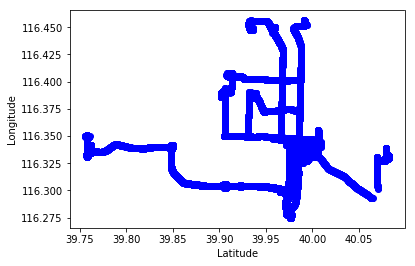

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(position_subset_x, position_subset_y, 'ob')
plt.xlabel('Latitude') 
plt.ylabel('Longitude')
plt.show()